In [1]:
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
# from pandas_datareader import data as wb
from scipy.stats import norm

In [2]:
#table plots
ticker = yf.Ticker('PINS')
# get data of the most recent date
# **************************
#aapl_df = ticker.history(period='1y')
# ****************************
days = "300"
df = ticker.history(period= days + 'd')# get data of the most recent date

# endDate = dt.datetime.now()
# startDate = endDate -dt.timedelta(days = 436)
# data_frame = yf.download(['PINS'], startDate)


In [3]:
stock_close_data = df['Close']
print(stock_close_data)
# stock_close_data.tail
# print("*******************")
# df_close_data = data_frame['Adj Close']
# print(df_close_data)


Date
2023-02-16 00:00:00-05:00    24.840000
2023-02-17 00:00:00-05:00    24.430000
2023-02-21 00:00:00-05:00    24.450001
2023-02-22 00:00:00-05:00    25.139999
2023-02-23 00:00:00-05:00    25.500000
                               ...    
2024-04-22 00:00:00-04:00    32.730000
2024-04-23 00:00:00-04:00    33.020000
2024-04-24 00:00:00-04:00    32.849998
2024-04-25 00:00:00-04:00    32.639999
2024-04-26 00:00:00-04:00    33.959999
Name: Close, Length: 300, dtype: float64


In [15]:
log_returns = np.log(1+stock_close_data.pct_change())#obtains simple returns from a provided dataset 
print(log_returns)
# log_returns.tail()

# df_log_returns = np.log(1+df_close_data.pct_change())#obtains simple returns from a provided dataset 
# print(df_log_returns)

Date
2023-02-16 00:00:00-05:00         NaN
2023-02-17 00:00:00-05:00   -0.016643
2023-02-21 00:00:00-05:00    0.000818
2023-02-22 00:00:00-05:00    0.027830
2023-02-23 00:00:00-05:00    0.014218
                               ...   
2024-04-22 00:00:00-04:00    0.010134
2024-04-23 00:00:00-04:00    0.008821
2024-04-24 00:00:00-04:00   -0.005162
2024-04-25 00:00:00-04:00   -0.006413
2024-04-26 00:00:00-04:00    0.039645
Name: Close, Length: 300, dtype: float64


<Axes: xlabel='Date'>

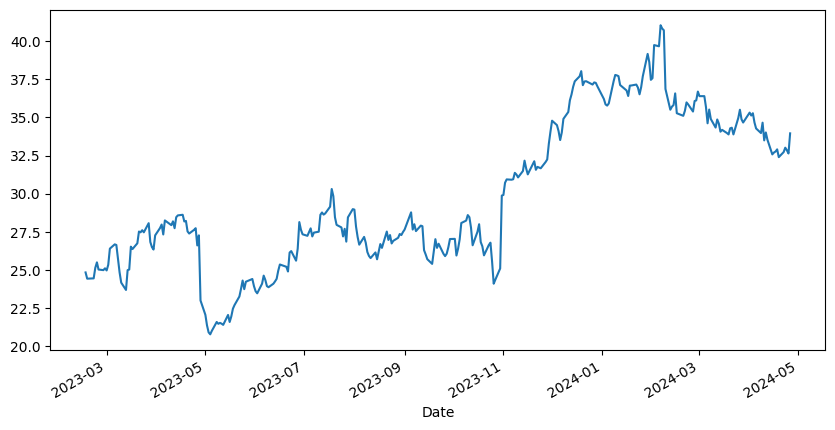

In [16]:
stock_close_data.plot(figsize=(10,5))

In [197]:
# df_close_data.plot(figsize=(10,5))

<Axes: xlabel='Date'>

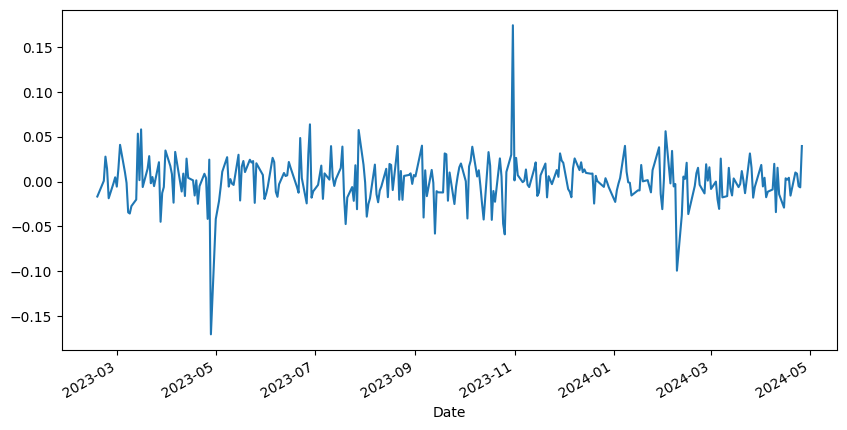

In [17]:
log_returns.plot(figsize=(10,5))
# df_log_returns.plot(figsize=(10,5))

In [19]:
u = log_returns.mean()
# u = df_log_returns.mean()
print(type(u))
print(u)

<class 'numpy.float64'>
0.0010459132818596878


In [20]:
var = log_returns.var()
# var = df_log_returns.var()
print(type(var))
print(var)

<class 'numpy.float64'>
0.0006660518583538948


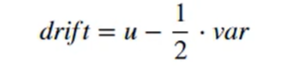
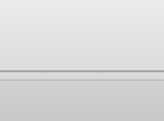

In [21]:
drift = u - 1/2 * var 
print(type(drift))
print(drift)

<class 'numpy.float64'>
0.0007128873526827404


In [22]:
stdev = log_returns.std()
print(stdev)

0.02580798051676835


brownian motion 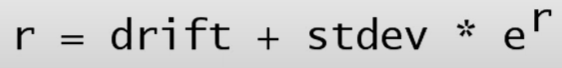

In [23]:
type(drift)
type(stdev)

numpy.float64

In [24]:
np.array(drift)


array(0.00071289)

In [25]:
norm.ppf(0.95) #percent chance of occuring
x = np.random.rand(10,2)
print(x)
norm.ppf(x)

[[0.97300986 0.4321604 ]
 [0.96765826 0.11305478]
 [0.97164167 0.97153305]
 [0.59542123 0.33132946]
 [0.89481893 0.97732838]
 [0.2769908  0.0631834 ]
 [0.26755475 0.76991298]
 [0.70966844 0.71647279]
 [0.88413763 0.0381974 ]
 [0.2931612  0.65550465]]


array([[ 1.92699484, -0.17087658],
       [ 1.84743949, -1.21044143],
       [ 1.90548799,  1.90381789],
       [ 0.24151301, -0.43624508],
       [ 1.25257025,  2.0014563 ],
       [-0.59180435, -1.52858727],
       [-0.62022525,  0.7385603 ],
       [ 0.55241637,  0.57239496],
       [ 1.19592781, -1.77199857],
       [-0.54417305,  0.40022514]])

In [26]:
z = norm.ppf(np.random.rand(10,2)) # z corecponds to the distance between the mean and the events, expressed as the number of standard deviations
z

array([[-0.8458192 ,  0.27672189],
       [-1.45130629,  1.80976702],
       [-0.32973903,  0.96294144],
       [ 0.72680047,  0.62271642],
       [-1.08541076,  0.23375795],
       [ 0.19972221,  1.03071776],
       [-1.39485158,  0.60089275],
       [ 0.32994024,  0.04197976],
       [ 1.75614926, -0.54218483],
       [ 0.24325518,  1.60150178]])

In [33]:
t_intervals = 10 #forcasting the stock price of future 1000 days
iterations = 20 #series of future stock predictions

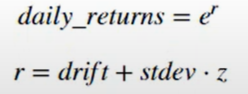

In [34]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.02177382, 1.01848163, 0.99786918, 1.01989863, 0.98420594,
        1.01001148, 1.04521701, 0.98762892, 0.95903113, 1.04817469,
        0.99488532, 1.03486758, 0.95709988, 0.97412085, 0.98558549,
        0.9984178 , 0.95488513, 0.95372221, 0.97454817, 0.95356162],
       [1.02699274, 1.03677217, 1.00297498, 1.04574127, 0.97821967,
        1.00114037, 0.97362042, 0.99586342, 1.00524411, 0.97036597,
        0.99839103, 0.99007559, 1.01029139, 0.96069958, 1.00077533,
        1.01300531, 0.9972836 , 0.99002926, 1.00210137, 1.00311396],
       [1.0119491 , 1.07695842, 0.96193118, 1.00762996, 0.9859388 ,
        1.00245506, 1.00230501, 0.99537361, 0.95823607, 0.98575572,
        0.96609239, 0.97793532, 1.03951801, 0.96143742, 0.98986619,
        1.00067326, 1.03320207, 1.00389744, 1.05493515, 0.96401643],
       [1.00680878, 0.99053749, 0.96487664, 1.0074843 , 1.01579769,
        0.97694403, 1.06198011, 1.02419614, 0.98728451, 1.02907577,
        0.97686585, 1.01934108, 0.97959479, 1

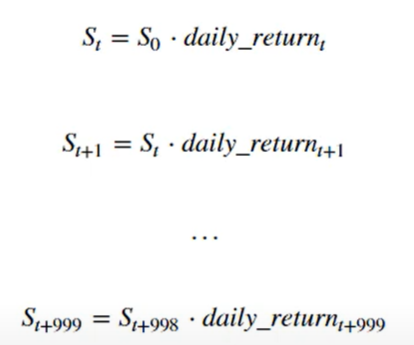

In [35]:
S0 = stock_close_data.iloc[-1]
S0

33.959999084472656

In [36]:
price_list = np.zeros_like(daily_returns)
price_list


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [37]:
price_list[0] = S0
price_list

array([[33.95999908, 33.95999908, 33.95999908, 33.95999908, 33.95999908,
        33.95999908, 33.95999908, 33.95999908, 33.95999908, 33.95999908,
        33.95999908, 33.95999908, 33.95999908, 33.95999908, 33.95999908,
        33.95999908, 33.95999908, 33.95999908, 33.95999908, 33.95999908],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  

In [38]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

price_list

array([[33.95999908, 33.95999908, 33.95999908, 33.95999908, 33.95999908,
        33.95999908, 33.95999908, 33.95999908, 33.95999908, 33.95999908,
        33.95999908, 33.95999908, 33.95999908, 33.95999908, 33.95999908,
        33.95999908, 33.95999908, 33.95999908, 33.95999908, 33.95999908],
       [34.87667252, 35.2087819 , 34.06102946, 35.51337259, 33.22033898,
        33.99872616, 33.06414848, 33.81952095, 34.13808894, 32.9536276 ,
        33.9053583 , 33.62296619, 34.30949467, 32.62535669, 33.98632917,
        34.40165943, 33.86775014, 33.62139273, 34.03136173, 34.06574911],
       [35.2934172 , 37.91839418, 32.76436637, 35.78433822, 32.75322101,
        34.08219511, 33.14036176, 33.66305858, 32.71234802, 32.48422686,
        32.7557085 , 32.88108619, 35.66533769, 31.36723861, 33.64191823,
        34.42482066, 34.99222951, 33.7524302 , 35.90087954, 32.83994187],
       [35.53372235, 37.55959096, 31.61357176, 36.052159  , 33.27064636,
        33.29639699, 35.194405  , 34.47757457, 3

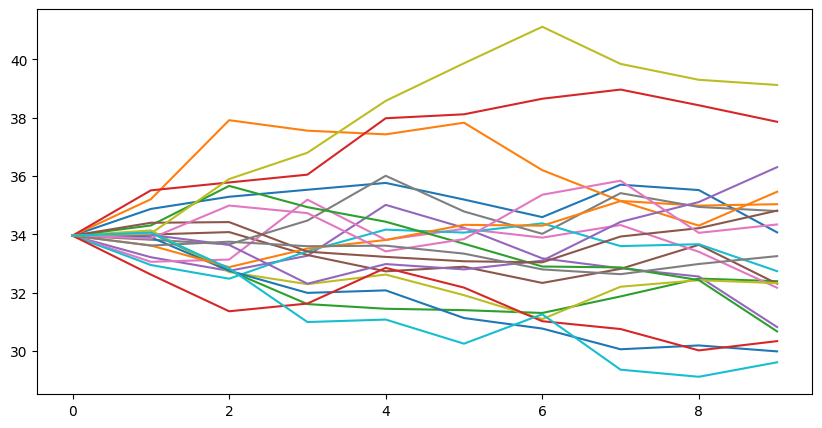

In [39]:
plt.figure(figsize=(10,5))
plt.plot(price_list)